# GRIP at The Sparks Foundation

# Exploring Supervised Machine Learning

### In this  task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Linear regression

In [1]:
##Importing the essential libraries
import pandas as pd
import numpy as np

In [2]:
##Importing the data from the Url
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)

In [3]:
##displaying the top 5 records in the dataset 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###### The dataset consists of only two features 'Hours' and 'scores'

# Data analysis

In [4]:
##info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


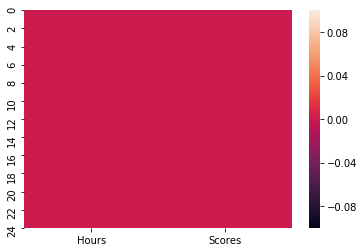

In [6]:
##Checking whether the datast has null values and visualizing it usinng heatmap
import seaborn as sns
data.isnull()
sns.heatmap(data.isnull())

In [7]:
##correlation of the dataset
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


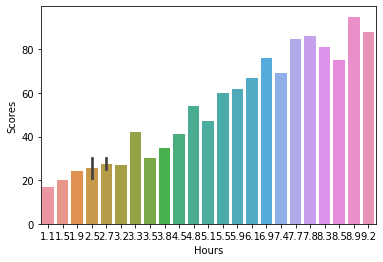

In [8]:
sns.barplot(x='Hours',y='Scores',data=data)

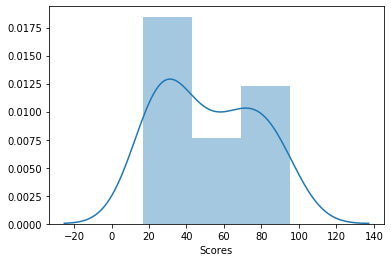

In [9]:
##Distribution of Score Feature
sns.distplot(data['Scores'])

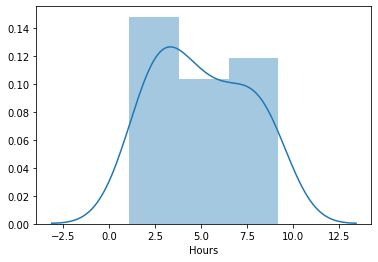

In [10]:
##Distribution of Hours feature
sns.distplot(data['Hours'])

In [11]:
##Splitting the dataset into x(Independent feature) and y(Dependent feature )
x=data[['Hours']]
y=data['Scores']

In [12]:
##Scaling down 'x'
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [14]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


# Model buliding

In [15]:
##Spliting the X and y into X_train,X_test,y_train,y_test for prediction
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
##Importing LinearRegression from sci-kit learn module
from sklearn.linear_model import LinearRegression

In [17]:
##Assigning the LinearRegression object to regressor
regressor = LinearRegression()

In [18]:
##Training the model with x_train and y_train
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
##Predicting the y_test values
y_pred=pd.DataFrame(regressor.predict(x_test))

In [20]:
##Predicted values
y_pred

,0
0,12.442587
1,26.359448
2,20.395079
3,92.961570
4,70.098155


In [45]:
##Absolute values
pd.DataFrame(y_test)


,Scores
14,17
0,21
17,24
6,88
23,76


# Model Evaluation

In [23]:
#Mean squared error
from sklearn.metrics import mean_squared_error
regression_model_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", regression_model_mse)

Mean Squared Error:  24.387620339856632


In [24]:
##r2_score-to find the goodness of fit of the model
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9735538080811826

In [25]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.877039354964483


In [26]:
regressor.score(x_test,y_test)

0.9735538080811826

#### The Acuracy of the model is 97%

# Prediction

### Predicting the score,if the study time is 9.25 hours

In [34]:
prediction=regressor.predict([[9.25]])
print("If the study time is 9.25 hours the score will be :{} ".format(prediction))

If the study time is 9.25 hours the score will be :[93.45860056] 
